In [63]:
# REC.ipynb
# Author: Amirhessam Tahmassebi 
#         Email: <admin@amirhessam.com>
#         Website: <www.amirhessam.com>

In [64]:
# Loading Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

In [65]:
# Loading a sample regression dataset
boston = datasets.load_boston()
X = boston.data
y_true = boston.target

In [66]:
# Defining a simple linear regression model
LR = linear_model.LinearRegression()

# predicting using 10-folds cross-validation
y_pred = cross_val_predict(LR, X, y_true, cv=10)

In [68]:
# Function for Regression Error Characteritic Curve

def REC(y_true , y_pred):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_true)):
            if np.linalg.norm(y_true[j] - y_pred[j]) / np.sqrt( np.linalg.norm(y_true[j]) **2 + np.linalg.norm(y_pred[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_true))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC
    

In [69]:
# finding the deviation and accuracy, and area under curve for plotting
Deviation , Accuracy, AUC = REC(y_true , y_pred)

In [70]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_true , y_pred)

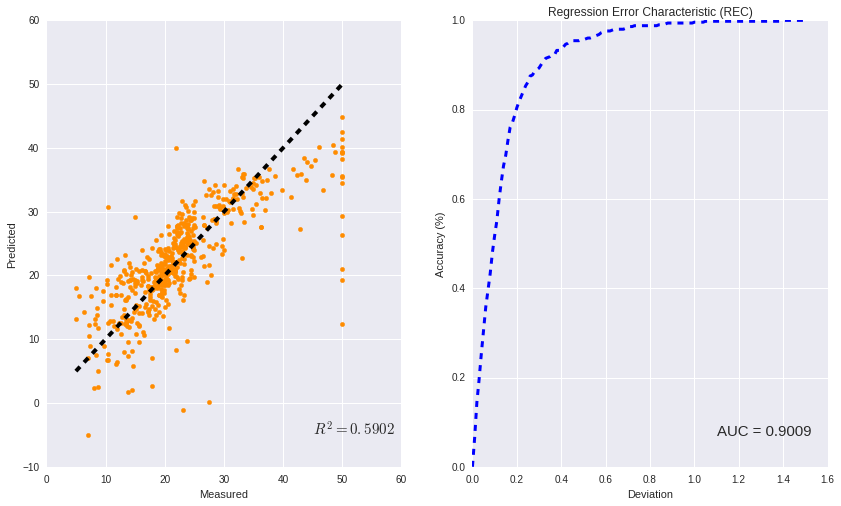

In [71]:
# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred,color = "darkorange")
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()